In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import cv2
import torch
from peddet.dataset import PennFudanDataset

# Visualization utils

In [31]:
cv2.putText?

In [42]:
# colors
class Color:
    CYAN = (0,255,255)
    RED = (255,0,0)
    BLUE = (0,0,255)
    WHITE = (255,255,255)
    BLACK = (0,0,0)

def to_numpy(x:torch.Tensor,permute=False):
    if permute:
        x = x.permute(1,2,0)
    return x.cpu().detach().numpy()

def draw_boxes(image,boxes,labels=None,color=Color.WHITE,lw=2):
        if labels is None:
            labels = [''] * len(boxes)
        for bbox,label in zip(boxes,labels):
            x_min,y_min,x_max,y_max = bbox
            # Draw bounding box
            cv2.rectangle(
                image,
                (x_min,y_min),
                (x_max,y_max),
                color=color,
                thickness=lw
            )
            # Draw label
            ((text_width, text_height), _) = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, lw)
            cv2.rectangle(image, (x_min, y_min - int(1.5 * text_height)), (x_min + text_width + 1, y_min), color, -1)
            cv2.putText(
                image,
                text=label,
                org=(x_min + 1, y_min - int(0.3 * text_height)),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.5, 
                color=Color.BLACK,
                lineType=cv2.LINE_AA
            )

def show_record(image,
                boxes,
                labels,
                lw=2,
                form='pascal_voc',
                ax=None):
    img_copy = image.copy()
    if form=='coco':
        boxes[:,2] = boxes[:,0] + boxes[:,2]
        boxes[:,3] = boxes[:,1] + boxes[:,3]
            
    draw_boxes(img_copy,boxes,labels,color=Color.CYAN)
    
    if ax is None:
        return img_copy
    
    return ax.imshow(img_copy)

# Data prep

In [23]:
fold = 2
df = pd.read_csv('data_with_folds.csv')
df[['x','y','x1','y1']] = pd.DataFrame(
    np.stack(df['box'].apply(ast.literal_eval)).astype(np.float32)
)

In [24]:
train_df = df.loc[df['fold'] != fold].copy()
train_dataset = PennFudanDataset(train_df)
record = train_dataset[0]

In [25]:
record

{'image': array([[[0.827451  , 0.78431374, 0.7137255 ],
         [0.8235294 , 0.78039217, 0.70980394],
         [0.83137256, 0.7882353 , 0.7176471 ],
         ...,
         [0.56078434, 0.3764706 , 0.30588236],
         [0.57254905, 0.3882353 , 0.31764707],
         [0.5803922 , 0.39607844, 0.3254902 ]],
 
        [[0.7019608 , 0.65882355, 0.5882353 ],
         [0.6784314 , 0.63529414, 0.5647059 ],
         [0.6666667 , 0.62352943, 0.5529412 ],
         ...,
         [0.49411765, 0.30980393, 0.23921569],
         [0.5019608 , 0.31764707, 0.24705882],
         [0.5019608 , 0.31764707, 0.24705882]],
 
        [[0.8       , 0.75686276, 0.6862745 ],
         [0.7607843 , 0.7176471 , 0.64705884],
         [0.7372549 , 0.69411767, 0.62352943],
         ...,
         [0.50980395, 0.3254902 , 0.25490198],
         [0.5137255 , 0.32941177, 0.25882354],
         [0.50980395, 0.3254902 , 0.25490198]],
 
        ...,
 
        [[0.8862745 , 0.8627451 , 0.8627451 ],
         [0.8509804 , 0.827451  

In [37]:
labels = list(map(train_dataset.classes.__getitem__, record['target']['labels'])); labels

['PASpersonWalking', 'PASpersonWalking']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


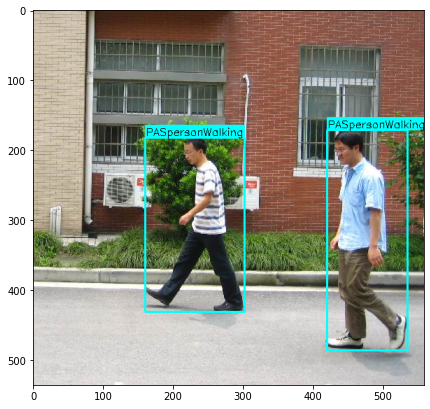

In [43]:
_,ax = plt.subplots(1,1,figsize=(7,7))
show_record(image=record['image'],
            boxes=record['target']['boxes'].astype(np.int32),
            labels=labels,
            ax=ax)